<a href="https://colab.research.google.com/github/wakii/ds_parrot/blob/master/Parrot_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MNIST - digit recognizer**
- Load Data
- Preprocessing
- Modeling


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0-rc3


#### Load Data
Mnist original dataset

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


In [0]:
y_train[0]

5

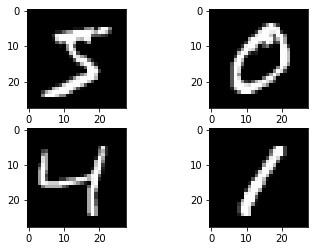

In [0]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

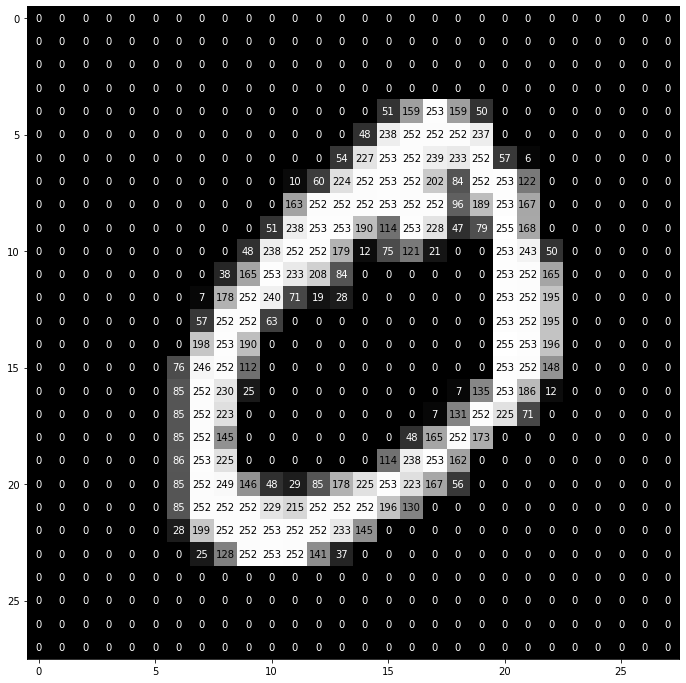

In [0]:
# visualize
def visualize_input(img, ax):
    ax.imshow(img, cmap = "gray")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy = (y, x),
                                  horizontalalignment = 'center',
                                  verticalalignment = 'center',
                                  color = 'white' if img[x][y] < thresh else 'black')
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualize_input(x_train[1].reshape(28, 28), ax)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


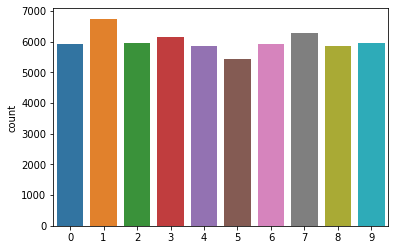

In [0]:
import seaborn as sns
g = sns.countplot(y_train)

#### Preprocessing
- normalize, one hot encoding

In [0]:
# Normalize
x_train = x_train/255
x_test = x_test/255

In [0]:
# reshape --> 1D(784)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2])).astype('float32')
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])).astype('float32')

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = 10

In [0]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Baseline Model(fully-connected)

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(784, input_dim = 784, kernel_initializer = 'normal',
                         activation = 'relu'))
model.add(tf.keras.layers.Dense(num_classes, kernel_initializer='normal',
                                activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


### **학습**
- model.fit으로도 학습이 가능합니다. 다만 이후에 학습 과정을 시각화하기를 원하면 history를 저장해주시면 됩니다.
- 일반화 정도 확인을 위해 validation data를 지정해줍니다. 이전에 나뉘어져 있는 경우 validation_data = (valid_x, valid_y) 이런식으로 넣어주면 되지만 train set만 보유하고 있는 경우 validation_split = (비율)로 validation data를 구성할 수 있습니다.

In [0]:
# model.fit(x_train, y_train, validation_data = (valid_x, valid_y)

In [0]:
# from sklearn.model_selection import train_test_split

In [0]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2742 - accuracy: 0.9214 - val_loss: 0.1484 - val_accuracy: 0.9562
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1076 - accuracy: 0.9687 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0693 - accuracy: 0.9798 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 0.0822 - val_accuracy: 0.9755
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.0767 - val_accuracy: 0.9773
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.0771 - val_accuracy: 0.9765

In [0]:
def acc_loss_plot(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))
print("Baseline Accuracy: %.2f%%" % (score[1]*100))

Baseline Error: 1.81%
Baseline Accuracy: 98.19%


#### Simple CNN

In [0]:
tf.keras.backend.clear_session()
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
model_1.add(tf.keras.layers.MaxPool2D())
model_1.add(tf.keras.layers.Dropout(0.2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_1.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

CNN은 3D(x, y, n_ch)를 입력으로 받기 때문에 앞서 784로 펴준 train data를 28x28로 reshape해줍니다. 채널도 1로 설정하여 데이터셋을 4D로 만들어줍니다.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
hist1 = model_1.fit(x_train, y_train, validation_split = 0.2, epochs = 10, batch_size = 128)

Epoch 1/10
375/375 [==============================] - 24s 65ms/step - loss: 0.2494 - accuracy: 0.9267 - val_loss: 0.0913 - val_accuracy: 0.9743
Epoch 2/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0798 - accuracy: 0.9768 - val_loss: 0.0596 - val_accuracy: 0.9830
Epoch 3/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0530 - val_accuracy: 0.9833
Epoch 4/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0450 - val_accuracy: 0.9869
Epoch 5/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 6/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0535 - val_accuracy: 0.9834
Epoch 7/10
375/375 [==============================] - 24s 65ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0423 - val_accuracy:

In [0]:
score_1 = model_1.evaluate(x_test, y_test, verbose = 0)
print("Simple CNN Error: %.2f%%" % (100-score_1[1]*100))
print("Simple CNN Accuracy: %.2f%%" % (score_1[1]*100))

Simple CNN Error: 1.14%
Simple CNN Accuracy: 98.86%


Baseline fitting


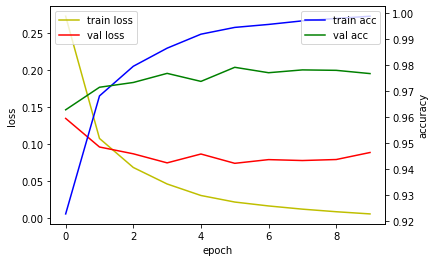

In [0]:
print("Baseline fitting")
acc_loss_plot(hist)

Simple CNN fitting


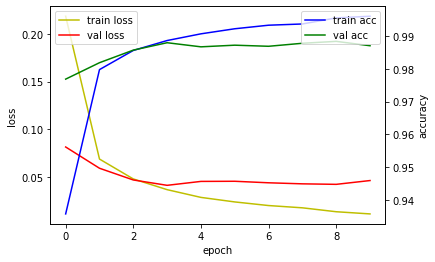

In [0]:
print("Simple CNN fitting")
acc_loss_plot(hist1)